In [1]:
libname t "/folders/myfolders/Teesta/data";
proc datasets library=t;
run;

In [ ]:
Sort the data set and look at it.  Note that at day 1, the percent is always 100%.

In [25]:
proc sort data=t.TUMOR;
    by treatment mouse day;
run;
proc print data=t.TUMOR(obs=100);
    var day treatment mouse pcntvol;
run;



Obs,day,Treatment,mouse,pcntvol
1,1,0,1,100.000
2,2,0,1,108.196
3,3,0,1,117.961
4,4,0,1,117.961
5,5,0,1,122.941
6,6,0,1,126.667
7,7,0,1,135.686
8,8,0,1,146.824
9,9,0,1,148.455
10,10,0,1,156.094



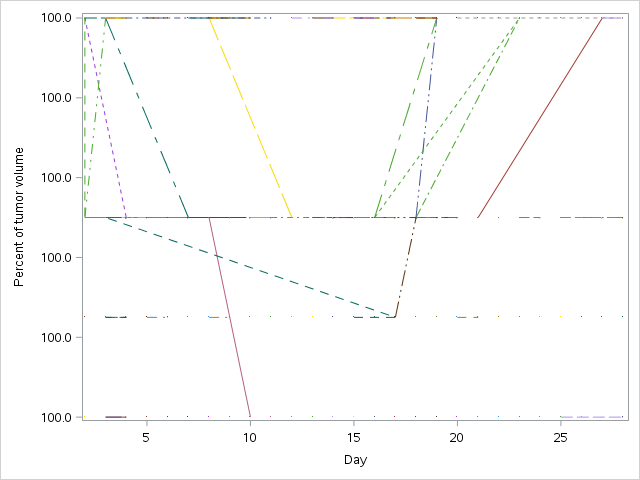

In [20]:
ods graphics on;
proc sgplot data=&BL_P;
    series x=day y=pcntvol/group=pcntvol_baseline;
run;
ods graphics off;

2. The tumor data is from a tumor growth experiment. The experiment
consisted of 4 treatment groups: vehicle control, TPA 50 ng/g, Taxol 10
ng/g, and the combination of the two drugs. The tumor sizes were
measured every day for 28 days. We are interested in the treatment effect
on the percentage of tumor volume relative to the baseline (Day 1)
tumor volume (variable name is pcntvol).

Assume that mouse 1 on treatment 1 is not the same as mouse 1 treatment 2.  Mouse is nested inside of treatment: mouse(trt).

Using your model to compare the treatment mean differences at
Day=2, 15, 20
and 28, and explain your results.

Comapare the average over all treatments at one day with the average over all treatments for a different day
Use a log link.


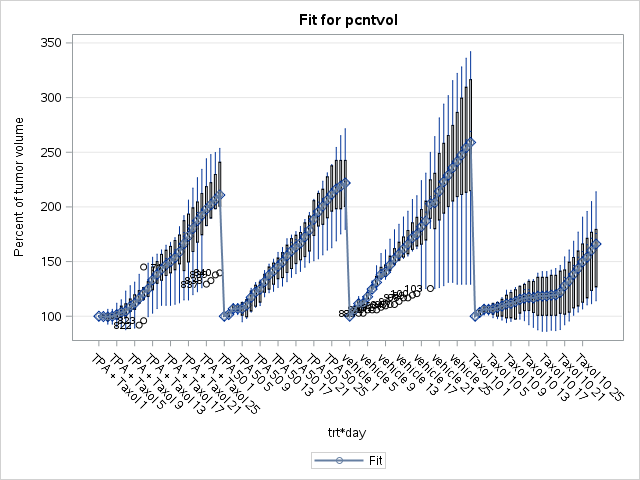
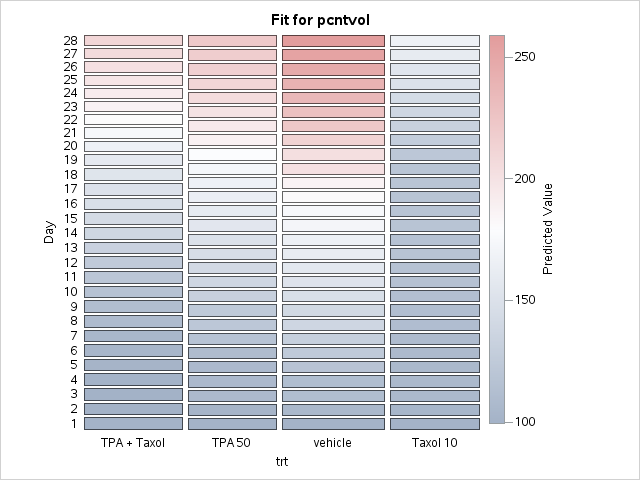

In [61]:
ods graphics on;
proc gee data=t.TUMOR plots=all;
    class mouse trt(ref='Taxol 10') day;
    model pcntvol = trt day trt*day/link=log;
    repeated subject=mouse(trt) /type=exch modelse logor=fullclust;
    effectplot box;
    effectplot mosaic;
    lsmestimate trt*day "trt*day day  2 vrs 15" [-1,1 2] [-1,2 2] [-1,3 2] [1,1 15] [1,2 15] [1,3 15],
                        "trt*day day  2 vrs 20" [-1,1 2] [-1,2 2] [-1,3 2] [1,1 20] [1,2 20] [1,3 20],
                        "trt*day day  2 vrs 28" [-1,1 2] [-1,2 2] [-1,3 2] [1,1 28] [1,2 28] [1,3 28],                                               
                        "trt*day day 15 vrs 20" [-1,1 15] [-1,2 15] [-1,3 15] [1,1 20] [1,2 20] [1,3 20],
                        "trt*day day 15 vrs 28" [-1,1 15] [-1,2 15] [-1,3 15] [1,1 28] [1,2 28] [1,3 28],
                        "trt*day day 20 vrs 28" [-1,1 20] [-1,2 20] [-1,3 20] [1,1 28] [1,2 28] [1,3 28]
    /E divisor=3 joint;
run;
ods graphics off;

Try without the log link


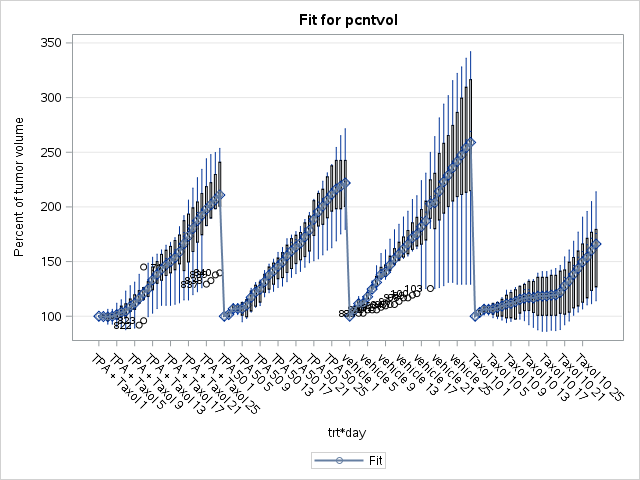
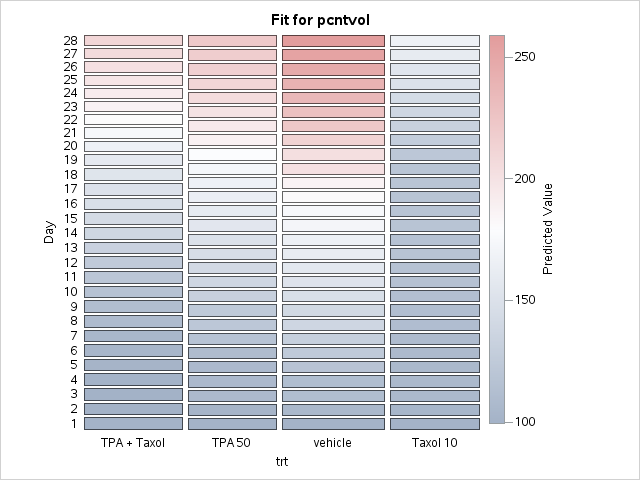

In [62]:
ods graphics on;
proc gee data=t.TUMOR plots=all;
    class mouse trt(ref='Taxol 10') day;
    model pcntvol = trt day trt*day/;
    repeated subject=mouse(trt) /type=exch modelse;
    effectplot box;
    effectplot mosaic;
    lsmestimate trt*day "trt*day day  2 vrs 15" [-1,1 2] [-1,2 2] [-1,3 2] [1,1 15] [1,2 15] [1,3 15],
                        "trt*day day  2 vrs 20" [-1,1 2] [-1,2 2] [-1,3 2] [1,1 20] [1,2 20] [1,3 20],
                        "trt*day day  2 vrs 28" [-1,1 2] [-1,2 2] [-1,3 2] [1,1 28] [1,2 28] [1,3 28],                                               
                        "trt*day day 15 vrs 20" [-1,1 15] [-1,2 15] [-1,3 15] [1,1 20] [1,2 20] [1,3 20],
                        "trt*day day 15 vrs 28" [-1,1 15] [-1,2 15] [-1,3 15] [1,1 28] [1,2 28] [1,3 28],
                        "trt*day day 20 vrs 28" [-1,1 20] [-1,2 20] [-1,3 20] [1,1 28] [1,2 28] [1,3 28]
    /E divisor=3 joint;
run;
ods graphics off;


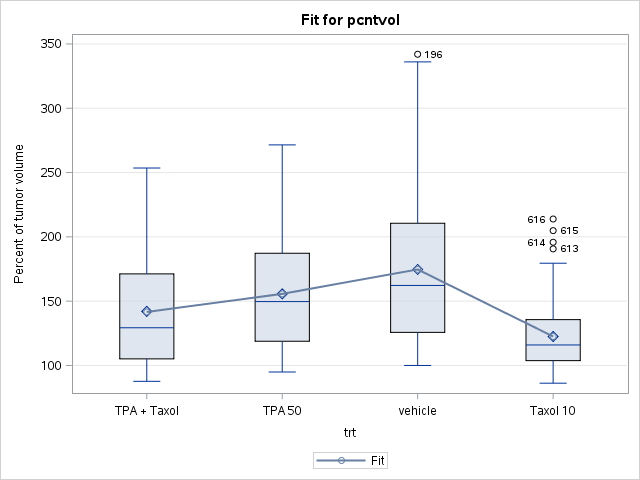
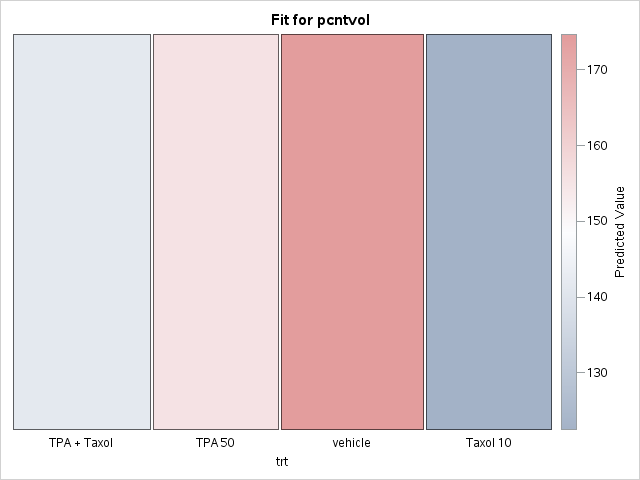

In [64]:
ods graphics on;
proc gee data=t.TUMOR plots=all;
    class mouse trt(ref='Taxol 10') day;
    model pcntvol = trt/;
    repeated subject=mouse(trt) /type=exch modelse;
    effectplot box;
    effectplot mosaic;
run;
ods graphics off;

In [ ]:
Parameterize using nlmixed.

In [74]:
proc nlmixed data=t.TUMOR;
     pred = b0 + u + b1*(trt='Taxol 10') + b2*(trt='vehicle') + b3*(trt='TPA 50') + b4*(trt='TPA + Taxol');
     model pcntvol ~ normal(pred,s2);
     random u ~ normal(0,s2u) subject=mouse;
run;

In [79]:
proc nlmixed data=t.TUMOR;
     parms s2u 1;
     pred = b0 + u + b1*(trt='Taxol 10') + b2*(trt='vehicle') + b3*(trt='TPA 50') + b4*(trt='TPA + Taxol');
     pred_log = exp(pred);
     model pcntvol ~ normal(pred_log,s2);
     random u ~ normal(0,s2u) subject=mouse;
run;

In [70]:
proc gee data=t.TUMOR plots=all;
    class mouse trt(ref='Taxol 10') day;
    model pcntvol = trt day trt*day;
    repeated subject=mouse(trt) /type=exch within=day;
    
run;

In [82]:
proc genmod data=t.TUMOR;
    class trt(ref='Taxol 10');
    model pcntvol = trt day trt*day/dist = normal link=log;
run;